# t-SNE

t-SNE not only captures the local structure of the higher dimension but also preserves the global structures of the data like clusters.

t-SNE is based on stochastic neighbor embedding(SNE). 


t-SNE was developed to address some of the problems in SNE.

## SNE


Stochastic neighbor embedding uses probablistic approach to __embedd a high dimension dataset into lower dimension by preserving the neighborhood structure of the dataset.__


__A gaussian probability distribution centered on each point is defined over all the potential neighbors of this point.__


__SNE aims to minimize the difference in probablity distribution in higher dimension and lower dimension.__


$$\text{For each object,   }i \text{    and it's neighbor    } j  \text{    , we compute a    } P_{i|j} \text{   which reflects the probability that   }j  \text{    is neighbor of   }i$$


$$\hspace{7em} P_{i|j} = \frac{\exp(-d_{ij}^2)}{\Sigma_{k\ne i}\exp(-d_{ij}^2)})$$

$$\text{where   }  d_{ij}^2  \text{     is the dissimilarity between element   } i \text{  and } j \text{   given as input or calculated from the dataset provided.  }$$

$$\text{  The dissimilarity between   } x_i \text{   and   } x_j \text{     can be calculated using the following formula  }$$

$$\hspace{7em} d_{ij}^2 = \frac{||x_i-x_j||^2}{2\sigma_i^2}$$

$$\text{where    } \sigma_i \text{     generally calculated through a binary search by equating the entropy of the distribution centered at    } x_i$$


$$\text{ to perplexity which is chosen by hand. This method generates a probability matrix which is asymmetric.}$$


$$\text{Next, SNE does the same calculation for every  }Y_i \text{   and  } Y_j \text{    in the lower dimension with gaussian probability distribution with   }\sigma = 0.5$$

$$\hspace{7em} q_{ij} = \frac{\exp(-||y_i-y_j||^2)}{\Sigma_k \exp(-||y_k-y_i||^2)}$$


Now, SNE tries to minimize the difference between these two distributions. 

__We can calculate the difference between two distributions using Kullback-Liebler divergence.__

For two discrete distirbution P and Q KL divergence is given by  

$$\hspace{7em} D_{KL}(P||Q) = \Sigma_i P_{i}\frac{P_{i}}{Q_{i}}$$


$$\text{  SNE defines a cost function based of the difference between   } p_{ij} \text{  and   } q_{ij} \text{  which is given by  }$$


$$\hspace{7em} C = \Sigma_i\Sigma_j P_{ij}log(\frac{P_{ij}}{q_{ij}})$$


While embedding the dataset in lower dimension, two kinds of error can occur:

- $$\text{neighbors are mapped as faraway points(  } p_{ij} \text{   large and  } q_{ij}  \text{  is small) }$$

- $$\text{  points which are far away mapped as neighbors(   } p_{ij} \text{  is small while  } q_{ij} \text{   is large).}$$



$$ \text{Look closely at the cost function, the cost of the first kind of error}$$

$$\text{ i.e. mapping large  } P_{ij}  \text{  with small   } q_{ij} \text{  is smaller than the cost while mapping small   }  p_{ij} \text{ as  large  } q_{ij}$$

The gradient to optimize the cost function is given by  


$$\hspace{7em} \frac{\delta C}{\delta Y} = 2\Sigma_i (P_{ij}-q_{ij}+P_{ji}-q_{ji})(y_i - y_j)$$


Some of the shorcomings of SNE approach are asymmetric probability matrix P, crowding problem. 

Since the probability matrix P is asymmetric. 

__Suppose a point Xi is far away from other points, its Pij will be very small for all j__.


__So, It will have little effect on the cost function and embedding it correctly in the lower dimension will be hard.__


related notes:

**Student-t distribution** 

It has very heavy tails.

As the *degree of freedom* increases it approaches the normal distribution function.  

When *degree of freedom* =1, it takes the form of cauchy distribution function and its probability density function is given by  

$$\hspace{7em} f(t) = \frac{1}{\pi (1+t^2)}$$


**Entropy** 

Entrophy is __measure of the average information contained in a data__. For a variable x with pdf  p(x)  , it is given by  

- info entropy (X)
$$\hspace{7em} H(x) = - \Sigma_{i}\,(\,p\,(x_i) \times  log(\,p(\,x_i\,)))$$


- info entropy (X,Y)

$$H(X,Y)=E[I(X,Y)]=\sum_{x,y} p(x,y)I(x,y)=-\sum_{x,y} p(x,y)log(p(x,y))$$


- conditional entropy

$$H(Y|X)=\sum_xp(x)H(Y|X=x) =-\sum_xp(x)\sum_yp(y|x)log(p(y|x))$$

$$=-\sum_{x,y}p(x,y)log(p(y|x)) =\sum_{x,y}p(x,y)log(\frac{p(x)}{p(x,y)})$$

$$H(Y|X)=H(X,Y)-H(X)$$


- cross entropy  (smaller --> more similar)

$$H(P,Q) = -\int P(x)logQ(x) dx$$

- relative entropy ( KL divergence: measurement of the dissimilarity between distribution P and Q)

$$KL(P||Q)=\int p(x)log(\frac{p(x)}{q(x)}) dx=-H(P)+H(P,Q) $$


**Perpexility** 


In information theory , __perplexity measures how good a probability distribution predicts a sample__. A low perplexity indicates that distribution function is good at predicting sample. It is given by  


$$\hspace{7em} Perpx(x) = 2^{H(x)}$$

where H(x) is the entropy of the distribution.  


## t-SNE algorithm


t-SNE differs from SNE in two ways:

- first it uses a student-t distribution to measure the similarity between points Y_i and Y_j in the lower dimension
- secondly for the higher dimension it uses symmetric probability distribution such that $$P_{ij} = P_{ji}$$.


$$\text{t-SNE defines the probability   }P_{ij}$$



$$\hspace{7em} P_{ij} = \frac{P_{ij}+P_{ij}}{2n}$$



$$\text{  This formulation makes sure that   } \Sigma_jP_{ij} \gt \frac{1}{2n} \text{  for every  } x_i \text{  and  } x_i $$



The gradient defined above 

$$\hspace{7em} \frac{\delta C}{\delta Y} = 2\Sigma_i (P_{ij}-q_{ij}+P_{ji}-q_{ji})(y_i - y_j)$$

becomes much simpler now:  

$$\hspace{7em} \frac{\delta C}{\delta Y_i} = 4 \Sigma_{ij}(P_{ij}-q_{ij})(Y_i-Y_j)$$


With student-t distribution having one degree one freedom , pairwise probability can be defined as  

$$\hspace{7em} q_{ij} = \frac{(1+||y_i-y_j||^2)^{-1}}{\Sigma_{k\ne i}(1+||y_i-y_k||^2)^{-1}}$$

Now the gradient changes to   


$$\hspace{7em}\frac{\delta C}{\delta Y_i} = 4 \Sigma_{ij}(P_{ij}-q_{ij})(Y_i-Y_j)(1+||y_i-y_j||^2)^{-1}$$

![](../images/tsne.png)

#### Compute pariwise similarities

$$\text{For computing pairwise similarities we need to know the variance   }\sigma_i  \text{   for the gaussian centered at   } x_i$$



$$\text{ The density of data is likely to vary, we need smaller   }\sigma_i   \text{  for places with higher densities and bigger   } \sigma_i \text{  for places where points are far away.   }$$


$$\text{The entropy of the gaussian distribution centered at   }x_i   \text{   increases as  } \sigma_i \text{  increases.}$$


$$\text{To get the  } \sigma_i   \text{   we need to perform a binary search such that perplexity of the gaussian distribution centered at }x_i  \text{  is equal to the perplexity specified by the user.   }$$  
Now, If you are thinking how perplexity fits into all this. You can think of perplexity as the smooth measure for the number of neighbors.  
Then, compute the pairwise similarity as    


$$\hspace{7em} P_{i|j} = \frac{\exp(-d_{ij}^2)}{\Sigma_{k\ne i}\exp(-d_{ij}^2)})$$ 

Once all the pairwise similarities have been calculated, update the similarity using the following rule  


$$\hspace{7em} P_{ii} = 0 $$  


$$\hspace{7em} P_{ij} = \frac{P_{ij}+P_{ji}}{2n}$$


In [20]:
from sklearn.metrics import pairwise as pw
import numpy as np

def entropy(dist, beta):
    
    
    p = np.exp(-dist*beta)
    
    sum_p = p.sum()
    p = p/sum_p
    
    entropy = -(p*np.log(p)).sum()
    
    return entropy, p

In [21]:
def calculate_pi(dists, perplexity,i):

    dists = np.delete(dists,[i])
    func = lambda x: entropy(dists, x)
    
    beta_min = float("-inf")
    beta_max = float("inf")
    beta = 1.0
    entropy1,p = func(beta)
    
    iter = 0
    log_u = np.log(perplexity)
    diff = entropy1-log_u
    
    while(True):
        # base goal: reduce [entropy-log(perplexity)]
        if np.abs(diff) < 1e-5:        
            p = np.insert(p,i,0)
            return(p)
        
        if diff > 0.0:
        
            beta_min = beta
            if beta_max == np.inf or beta_max == -np.inf:
                beta *= 2.0
            else:
                beta = (beta + beta_max)/2.0
        else:
            beta_max = beta
            if beta_min == np.inf or beta_min == -np.inf:
                beta /= 2.0
            else:
                beta = (beta + beta_min) / 2.0
        
        iter += 1
        entropy1,p = func(beta)
        diff = entropy1-log_u
        if iter > 50:
            p = np.insert(p,i,0)
            
            return p

In [22]:
def get_Pmat(X, perplexity):
    n,p = X.shape
    P = np.zeros((n,n))
    D = pw.euclidean_distances(X, squared = True)
    
    for i in range(n):
    
        P[i] = calculate_pi(D[i], perplexity, i)

    P = (P + P.T)
    
    P = P/P.sum()
    return P

### calculation of low dimensional embedding

have a close look at the gradient obtained    

$$\hspace{7em}\frac{\delta C}{\delta y_i} = 4 \Sigma_{ij}(P_{ij}-q_{ij})(y_i-y_j)(1+||y_i-y_j||^2)^{-1}$$


The t-SNE gradient is better in two ways, first, it induces heavy cost when dissimilar points are modelled by small pairwise distances in lower dimension and  it doesn't approach infinity due to which separate clusters are not pushed very far from each other.  
Update equation for $y_i$ is given as  

$$\hspace{7em} y_i^t = y_i^{t-1} + \eta \frac{\delta C}{\delta y_i} + (y_i^{t-1} - y_i^{t-2})$$  

$$\hspace{7em}  \text{  where  } t \text{  is the iteration.  }$$

In [23]:
def q(D):
    
    # q_{ij} = \frac{(1+||y_i-y_j||^2)^{-1}}   {\Sigma_{k\ne i}(1+||y_i-y_k||^2)^{-1}}
    
    D = 1/(1+D) 
    
    np.fill_diagonal(D,0.0)
    
    q = D/D.sum()
    
    return q

In [24]:
def get_gradient(Y,P,q,D_low):
    
    # \frac{\delta C}{\delta y_i} = 4 \Sigma_{ij}(P_{ij}-q_{ij})(y_i-y_j)(1+||y_i-y_j||^2)^{-1}
    
    n, d = Y.shape
    grad = np.zeros((n,d))
    
    D = 1/(1+D_low)
    temp = (P - q)*D
    
    for i in range(n):
        grad[i,:] = np.sum(temp[i,:].reshape(n,1)*(Y[i,:]-Y), axis=0)
    
    return grad

In [25]:
def cost_KL(P,q):
    
    n = P.shape[0]
    q[range(n),range(n)] = 1.00
    temp = P/q
    temp[temp==0.0]=1.0
    cost = (P*np.log(temp)).sum()
    return cost

In [26]:
np.random.seed(1000)

def t_sne(X,perplexity, n_dim):
    
    P = get_Pmat(X, perplexity)
    
    # value of lower dimension
    n,p = X.shape
    
    # generate a random sample of values for Y
    Y = np.random.rand(n,n_dim)

    # calculate the dissimilarity matrix for lower dimension points
    D_low = pw.euclidean_distances(Y, squared = True)
    minus = lambda x,y: (x-y).sum()
    alpha = 0.5
    max_iter=100

    Y_t_1 = np.zeros( (n, n_dim) )
    Y_t_2 = np.zeros( (n, n_dim) )
    eta = 0.9
    cost_old = 0.0
    q_ = q(D_low)

    cost_old = cost_KL(P,q_)
    
    for i in range(max_iter):
    
        grad = get_gradient(Y,P,q_,D_low)
    
        diff =  Y_t_1 - Y_t_2 
        Ynew = Y + eta*grad + alpha*(diff)  # Ynew - Y = + eta*grad + alpha*(Y_t_1 - Y_t_2)
        
        # update Y
        Y_t_2 = Y_t_1
        Y_t_1 = Y
        Y = Ynew
    
        D_low = pw.euclidean_distances(Y, squared = True)
    
        q_ = q(D_low)
        cost_new = cost_KL(P,q_)
        
        # goal:
        if abs(cost_old - cost_new) <1e-4:
            break
        else:
            cost_old = cost_new

    return(Y)



How to select perplexity for the t-sne?
Perplexity is an important parameter of the t-sne algorithm. 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':


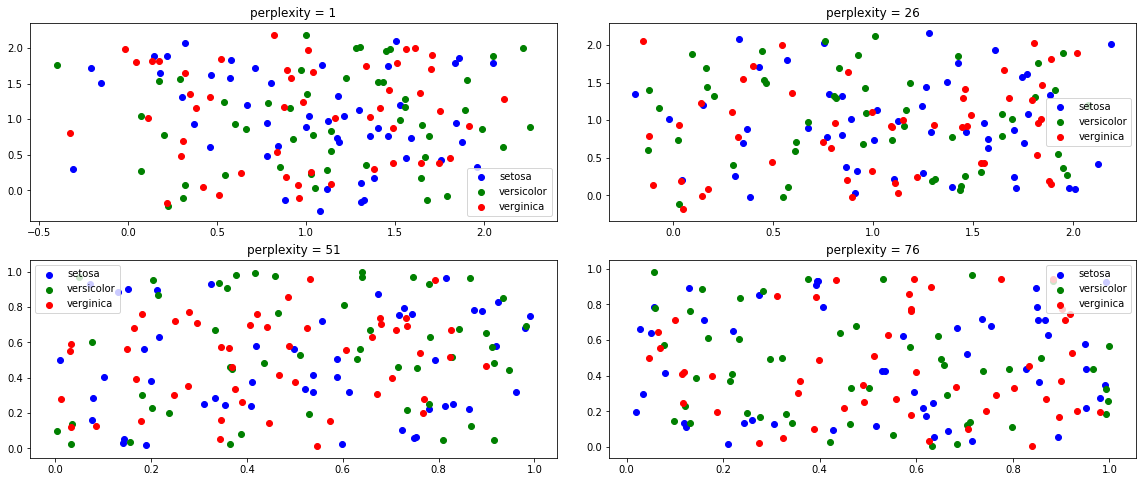

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (16,8)

iris = datasets.load_iris().data
target = datasets.load_iris().target

def plotter(x, ax):
    
    Y = t_sne(iris, x,2)
    
    setosa = Y[target==0]
    versicolor = Y[target==1]
    verginica = Y[target==2]
    
    ax = ax or plt.gca()
    ax.scatter(setosa[:,0], setosa[:,1], c="b",label="setosa")
    ax.scatter(versicolor[:,0], versicolor[:,1], c="g",label="versicolor")
    ax.scatter(verginica[:,0], verginica[:,1], c="r",label="verginica")
    ax.legend(loc='best')


fig, ax = plt.subplots(2, 2)
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

for axi, x in zip(ax.flat, range(1, 100, 25)):
    plotter(x, ax=axi)
    axi.set_title('perplexity = {0}'.format(x))


If change value of perplexity we will see that, its clusters changes dramatically. For t_sne to be meaningful we have to choose right value of perplexity. Perplexity balances the local and global aspects of the dataset. Very high value will lead to the merging of clusters into a single big clusters and low will produce many close small clusters which will be meaningless.

### Advantages and Drawbacks

t-SNE works well for non-linear datasets. It work much better than other non-linear algorithms. Problems arise when intrinsic dimensions are higher i.e. more than 2-3 dimensions. t-SNE has tendency to get stuck in local optima. 